In [8]:
from __future__ import division
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

import seaborn as sns
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [4]:
def write_answer(ans, digit):
    string = "ans" + str(digit) + ".txt"
    with open(string, "w") as fout:
        fout.write(str(ans))

In [5]:
data = load_digits()
data.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [6]:
X = data["data"]
y = data["target"]

In [5]:
classifier = DecisionTreeClassifier()
cv = 10
score = cross_val_score(classifier, X, y, cv=cv)
answer = score.mean()

print(answer)
write_answer(answer, 1)

0.8341475926357393


In [35]:
classifier_bag = BaggingClassifier(classifier, n_estimators=100)

score = cross_val_score(classifier_bag, X, y, cv=cv)
answer = score.mean()

print(answer)
write_answer(answer, 2)

0.9528318494003141


In [36]:
max_features = int(np.sqrt(X.shape[1]))
classifier_bag = BaggingClassifier(classifier, n_estimators=100, 
                               max_features=max_features)

score = cross_val_score(classifier_bag, X, y, cv=cv)
answer = score.mean()

print(answer)
write_answer(answer, 3)

0.9343421431293457


In [37]:
max_features = int(np.sqrt(X.shape[1]))
classifier_4 = DecisionTreeClassifier(max_features=max_features)
classifier_bag = BaggingClassifier(classifier_4, n_estimators=100)

score = cross_val_score(classifier_bag, X, y, cv=cv)
answer = score.mean()

print(answer)
write_answer(answer, 4)

0.9528158522186709


In [41]:
classifier_randf = RandomForestClassifier(max_features=max_features,
                                      n_estimators=100)

score = cross_val_score(classifier_randf, X, y, cv=cv)
answer = score.mean()

print(answer)

0.9466505145758013


In [23]:
from sklearn.model_selection import learning_curve

def test_randforest(n_estimators,max_features, depth=None):
    
    estimator = RandomForestClassifier(max_features=max_features,
                                      n_estimators=n_estimators,
                                      max_depth=depth)

    (train_sizes, 
    train_scores, 
    test_scores) = learning_curve(estimator,
                                  X, y, cv=10,
                                  scoring='accuracy')
    
    plot_learn(train_sizes, train_scores, test_scores,
               n_estimators, max_features, depth)
    
                              
#  train_sizes=np.arange(0.1,1., 0.2)                                                                     

def plot_learn(train_sizes, train_scores, test_scores,
               n_estimators, max_features, depth):
    pylab.grid(True)
    pylab.plot(train_sizes, train_scores.mean(axis = 1), 
               'g-', marker='o', label='train')
    pylab.plot(train_sizes, test_scores.mean(axis = 1), 
               'r-', marker='o', label='test')
    pylab.ylim((0.0, 1.05))
    pylab.legend(loc='lower right')
    pylab.title("trees={}, features={}, depth={}".format(n_estimators, max_features, depth))
    pylab.xlabel("train size")
    pylab.ylabel("accuracy")
    pylab.show()

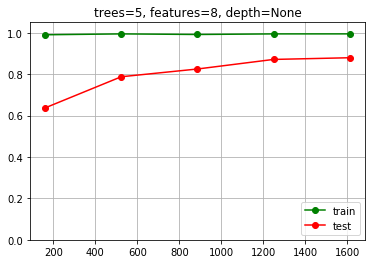

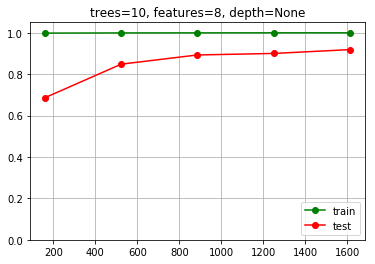

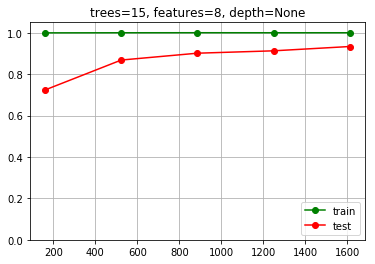

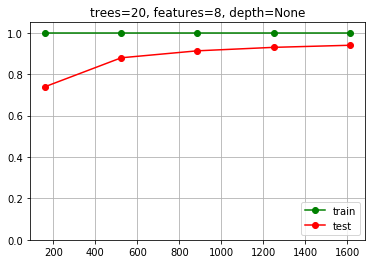

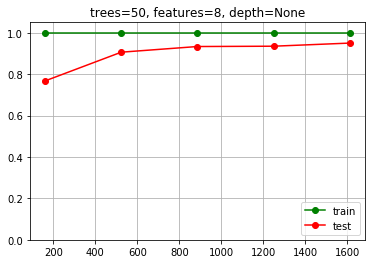

In [20]:
for i in [5,10,15,20,50]:
    max_features = int(np.sqrt(X.shape[1]))    
    test_randforest(i,max_features)

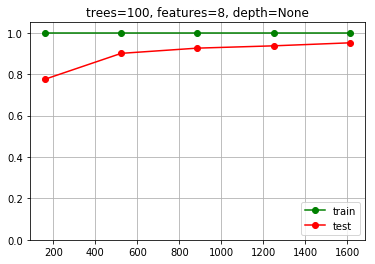

In [21]:
test_randforest(100,max_features)

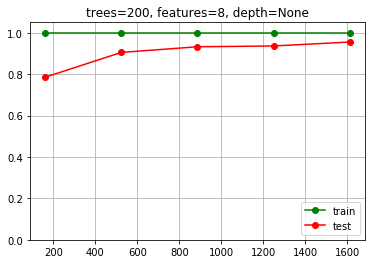

In [22]:
test_randforest(200,max_features)

2,3,4,7

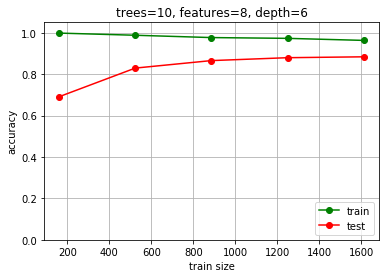

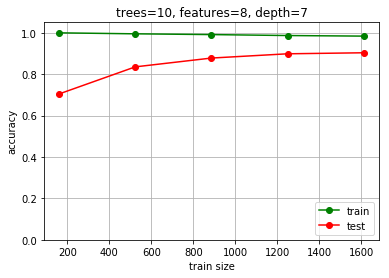

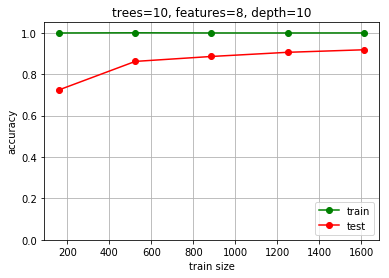

In [31]:
for i in [6,7,10]:
    
    test_randforest(10,max_features,i)


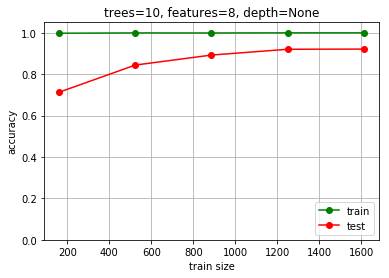

In [32]:
test_randforest(10,max_features)